# WeatherPy Analysis

In [1]:
# Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import date
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Today's date
today = date.today()

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = 'Weather_Output/cities.csv'

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f'Total cities collected: {len(cities)}.')

Total cities collected: 601.


## Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [3]:
# Identify base url for API call and units we want data to be displayed in
url = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'imperial'

# Build partial query URL
query_url = f'{url}appid={weather_api_key}&units={units}&q='

In [4]:
# Create blank DataFrame with desired columns headers and cities identified
weather_df = pd.DataFrame({'City': cities, 'Lat': '', 'Lng': '', 'Max Temp': '', 'Humidity': '', 
                           'Cloudiness': '', 'Wind Speed': '', 'Country': '', 'Date': ''})
weather_df

record_num = 1
set_num = 1

for index, row in weather_df.iterrows():
    
    city_query = query_url + row['City']
    response = requests.get(city_query).json()

    try:
        print(f'Processing Record {record_num} of Set {set_num} | {response["name"]}')

        weather_df.loc[index, 'Lat'] = response['coord']['lat']
        weather_df.loc[index, 'Lng'] = response['coord']['lon']
        weather_df.loc[index, 'Max Temp'] = response['main']['temp_max']
        weather_df.loc[index, 'Humidity'] = response['main']['humidity']
        weather_df.loc[index, 'Cloudiness'] = response['clouds']['all']
        weather_df.loc[index, 'Wind Speed'] = response['wind']['speed']
        weather_df.loc[index, 'Country'] = response['sys']['country']
        weather_df.loc[index, 'Date'] = response['dt']

    except (KeyError, IndexError):
        print(f'City not found...Skipping')

    record_num += 1
    
    if record_num == 101:
        set_num += 1
        record_num = 1

Processing Record 1 of Set 1 | Lebu
Processing Record 2 of Set 1 | Ancud
Processing Record 3 of Set 1 | Ushuaia
City not found...Skipping
Processing Record 5 of Set 1 | Fortuna
Processing Record 6 of Set 1 | Kapaa
Processing Record 7 of Set 1 | Verkhnyaya Tula
Processing Record 8 of Set 1 | Kidal
Processing Record 9 of Set 1 | Bluff
City not found...Skipping
Processing Record 11 of Set 1 | São João do Paraíso
Processing Record 12 of Set 1 | Tomatlán
Processing Record 13 of Set 1 | ‘Ewa Beach
Processing Record 14 of Set 1 | Eirunepé
Processing Record 15 of Set 1 | Mataura
Processing Record 16 of Set 1 | Ambon City
Processing Record 17 of Set 1 | Husavik
Processing Record 18 of Set 1 | Vanimo
City not found...Skipping
City not found...Skipping
Processing Record 21 of Set 1 | Hobart
Processing Record 22 of Set 1 | Katsuura
City not found...Skipping
Processing Record 24 of Set 1 | Rikitea
Processing Record 25 of Set 1 | Norman Wells
Processing Record 26 of Set 1 | Isangel
Processing Record

Processing Record 6 of Set 3 | Vanavara
Processing Record 7 of Set 3 | Raudeberg
Processing Record 8 of Set 3 | Asău
Processing Record 9 of Set 3 | Gedangan
Processing Record 10 of Set 3 | Lavrentiya
Processing Record 11 of Set 3 | Aripuanã
Processing Record 12 of Set 3 | Eyl
Processing Record 13 of Set 3 | Iwanai
Processing Record 14 of Set 3 | Hasaki
Processing Record 15 of Set 3 | Carnarvon
Processing Record 16 of Set 3 | Esim
Processing Record 17 of Set 3 | Sept-Îles
Processing Record 18 of Set 3 | Clyde River
Processing Record 19 of Set 3 | Constitución
Processing Record 20 of Set 3 | Cururupu
Processing Record 21 of Set 3 | Deputatsky
Processing Record 22 of Set 3 | Gravdal
Processing Record 23 of Set 3 | Ambilobe
Processing Record 24 of Set 3 | Ilulissat
Processing Record 25 of Set 3 | Visby
Processing Record 26 of Set 3 | Santander
Processing Record 27 of Set 3 | Cherskiy
Processing Record 28 of Set 3 | Forbes
Processing Record 29 of Set 3 | San Quintín
Processing Record 30 of 

Processing Record 12 of Set 5 | Akureyri
Processing Record 13 of Set 5 | Vung Tau
Processing Record 14 of Set 5 | Sadovoye
Processing Record 15 of Set 5 | Noumea
Processing Record 16 of Set 5 | Seoul
Processing Record 17 of Set 5 | Viamão
Processing Record 18 of Set 5 | Ailigandí
Processing Record 19 of Set 5 | Alice Springs
Processing Record 20 of Set 5 | Hilton Head
Processing Record 21 of Set 5 | Laguna
City not found...Skipping
Processing Record 23 of Set 5 | Pemangkat
Processing Record 24 of Set 5 | Shellbrook
Processing Record 25 of Set 5 | Pokhara
Processing Record 26 of Set 5 | Koutselio
Processing Record 27 of Set 5 | Yafran
Processing Record 28 of Set 5 | Swanton
Processing Record 29 of Set 5 | Kholmogory
Processing Record 30 of Set 5 | Kirksville
City not found...Skipping
Processing Record 32 of Set 5 | Klaksvík
Processing Record 33 of Set 5 | Iāwar
Processing Record 34 of Set 5 | Chunoyar
Processing Record 35 of Set 5 | Valley City
Processing Record 36 of Set 5 | Aguadas
Pr

In [5]:
# Print the weather DataFrame
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lebu,-37.6167,-73.65,53.29,78,68,12.77,CL,1650833275
1,ancud,-41.8697,-73.8203,46.22,78,69,24.34,CL,1650833358
2,ushuaia,-54.8,-68.3,44.26,65,75,5.75,AR,1650833254
3,taolanaro,,,,,,,,
4,fortuna,40.5982,-124.157,61.93,75,0,11.5,US,1650833588
...,...,...,...,...,...,...,...,...,...
596,mayo,38.8876,-76.5119,82.2,59,0,10.36,US,1650833762
597,melfort,52.8667,-104.618,39.33,52,100,13.71,CA,1650833763
598,khormuj,,,,,,,,
599,dudinka,69.4058,86.1778,-14.58,100,100,3.4,RU,1650833732


## Clean the DataFrame and write to a CSV

In [6]:
# Replace the blank cells with 'NaN' values and drop all rows containing NaN values
weather_df.dtypes

columns = []

for column in weather_df:
    columns.append(column)

for column in columns:
    weather_df[column].replace('', np.nan, inplace = True)

weather_df = weather_df.dropna(how = 'any')
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lebu,-37.6167,-73.6500,53.29,78.0,68.0,12.77,CL,1.650833e+09
1,ancud,-41.8697,-73.8203,46.22,78.0,69.0,24.34,CL,1.650833e+09
2,ushuaia,-54.8000,-68.3000,44.26,65.0,75.0,5.75,AR,1.650833e+09
4,fortuna,40.5982,-124.1573,61.93,75.0,0.0,11.50,US,1.650834e+09
5,kapaa,22.0752,-159.3190,80.58,83.0,75.0,17.27,US,1.650834e+09
...,...,...,...,...,...,...,...,...,...
595,kingman,35.1894,-114.0530,72.12,2.0,0.0,8.01,US,1.650834e+09
596,mayo,38.8876,-76.5119,82.20,59.0,0.0,10.36,US,1.650834e+09
597,melfort,52.8667,-104.6177,39.33,52.0,100.0,13.71,CA,1.650834e+09
599,dudinka,69.4058,86.1778,-14.58,100.0,100.0,3.40,RU,1.650834e+09


In [7]:
# Convert Date column from Unix format to a readable date format
weather_df['Date'] = pd.to_datetime(weather_df['Date'], unit = 's').dt.date
weather_df.head()

/Users/graceolson/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lebu,-37.6167,-73.6500,53.29,78.0,68.0,12.77,CL,2022-04-24
1,ancud,-41.8697,-73.8203,46.22,78.0,69.0,24.34,CL,2022-04-24
2,ushuaia,-54.8000,-68.3000,44.26,65.0,75.0,5.75,AR,2022-04-24
4,fortuna,40.5982,-124.1573,61.93,75.0,0.0,11.50,US,2022-04-24
5,kapaa,22.0752,-159.3190,80.58,83.0,75.0,17.27,US,2022-04-24


In [8]:
# Inspect the Data to see if there are any cities where the humidity is > 100%
max_humidity = weather_df['Humidity'].max()
max_humidity
print(f'Of the cities collected, the max humidity is: {max_humidity}.')

Of the cities collected, the max humidity is: 100.0.


In [9]:
# Export the cleaned DataFrame to a csv file
weather_df.to_csv(output_data_file, index = False, header = True)

## Plot the Data

### Latitude vs. Temperature (F)

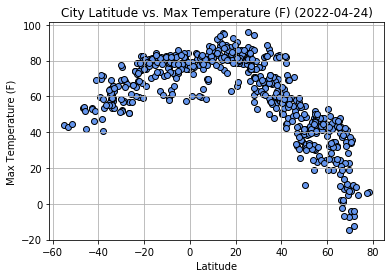

In [10]:
# Create a scatter plot of City Latitude vs. Max_Temp and save the plot as a .png to the Weather_Output directory
x_axis1 = weather_df['Lat']
y_axis1 = weather_df['Max Temp']

plt.scatter(x_axis1, y_axis1, marker = 'o', facecolor = 'cornflowerblue', edgecolor = 'black')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'City Latitude vs. Max Temperature (F) ({today})', fontsize = 12)
plt.grid(True)

plt.savefig('Weather_Output/City Latitude vs. Max Temperature.png')

plt.show()

### Observations:

* This graph plots city latitude against max temperature. 
* The plot shows cities closer to the equator (latitude 0 degrees) have higher max temperatures than those cities further from the equator. 
* In other words, the plot confirms our initial hypothesis that the weather gets hotter as we move closer to the equator.

### Latitude vs. Humidity (%)

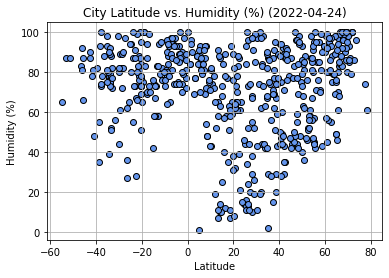

In [11]:
# Create a scatter plot of City Latitude vs. Humidity and save the plot as a .png to the Weather_Output directory
x_axis2 = weather_df['Lat']
y_axis2 = weather_df['Humidity']

plt.scatter(x_axis2, y_axis2, marker = 'o', facecolor = 'cornflowerblue', edgecolor = 'black')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs. Humidity (%) ({today})', fontsize = 12)
plt.grid(True)

plt.savefig('Weather_Output/City Latitude vs. Humidity.png')

plt.show()

### Observations:

* This graph plots city latitude against humidity levels. 
* Based on how scattered the plot is, there does not appear to be a strong relationship between city latitude and humidity levels. However, there does appear to be some clustering in the middle-left and upper-right corner of the plot.

### Latitude vs. Cloudiness (%)

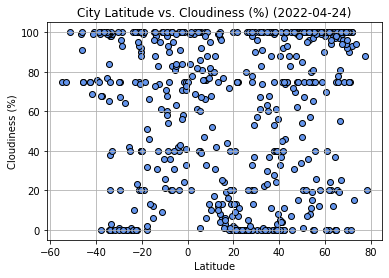

In [12]:
# Create a scatter plot of City Latitude vs. Cloudiness and save the plot as a .png to the Weather_Output directory
x_axis3 = weather_df['Lat']
y_axis3 = weather_df['Cloudiness']

plt.scatter(x_axis3, y_axis3, marker = 'o', facecolor = 'cornflowerblue', edgecolor = 'black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs. Cloudiness (%) ({today})', fontsize = 12)
plt.grid(True)

plt.savefig('Weather_Output/City Latitude vs. Cloudiness.png')

plt.show()

### Observations:

* This graph plots city latitude against cloudiness %.
* Based on how scattered the plot is, there does not appear to be a strong relationship between city latitude and cloudiness levels.

### Latitude vs. Wind Speed (mph)

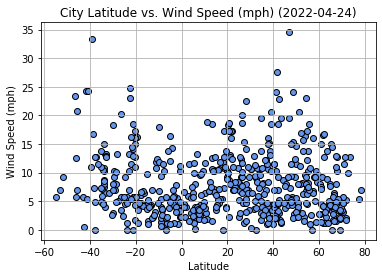

In [13]:
# Create a scatter plot of City Latitude vs. Cloudiness and save the plot as a .png to the Weather_Output directory
x_axis4 = weather_df['Lat']
y_axis4 = weather_df['Wind Speed']

plt.scatter(x_axis4, y_axis4, marker = 'o', facecolor = 'cornflowerblue', edgecolor = 'black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs. Wind Speed (mph) ({today})', fontsize = 12)
plt.grid(True)

plt.savefig('Weather_Output/City Latitude vs. Wind Speed.png')

plt.show()

### Observations

* This graph plots city latitude against wind speed. 
* Based on how scattered the plot is, there does not appear to be a strong relationship between city latitude and wind speed. However, the plot does show some clustering at the bottom, indicating wind speed rarely goes above 25 mph in the cities selected.

## Linear Regression

In [14]:
# Create a Northern Hemisphere DataFrame
northern_hemp = weather_df.loc[weather_df['Lat'] >= 0, :]
northern_hemp

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
4,fortuna,40.5982,-124.1573,61.93,75.0,0.0,11.50,US,2022-04-24
5,kapaa,22.0752,-159.3190,80.58,83.0,75.0,17.27,US,2022-04-24
6,verkh-tula,54.8839,82.7762,29.98,80.0,0.0,4.47,RU,2022-04-24
7,kidal,18.4411,1.4078,84.51,7.0,0.0,10.83,ML,2022-04-24
11,tomatlan,19.9333,-105.2500,87.06,38.0,2.0,10.25,MX,2022-04-24
...,...,...,...,...,...,...,...,...,...
595,kingman,35.1894,-114.0530,72.12,2.0,0.0,8.01,US,2022-04-24
596,mayo,38.8876,-76.5119,82.20,59.0,0.0,10.36,US,2022-04-24
597,melfort,52.8667,-104.6177,39.33,52.0,100.0,13.71,CA,2022-04-24
599,dudinka,69.4058,86.1778,-14.58,100.0,100.0,3.40,RU,2022-04-24


In [15]:
# Create a Southern Hemisphere DataFrame
southern_hemp = weather_df.loc[weather_df['Lat'] < 0, :]
southern_hemp

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lebu,-37.6167,-73.6500,53.29,78.0,68.0,12.77,CL,2022-04-24
1,ancud,-41.8697,-73.8203,46.22,78.0,69.0,24.34,CL,2022-04-24
2,ushuaia,-54.8000,-68.3000,44.26,65.0,75.0,5.75,AR,2022-04-24
8,bluff,-46.6000,168.3333,53.80,83.0,99.0,23.47,NZ,2022-04-24
10,sao joao do paraiso,-15.3136,-42.0144,77.36,42.0,12.0,9.75,BR,2022-04-24
...,...,...,...,...,...,...,...,...,...
581,yulara,-25.2406,130.9889,57.04,94.0,40.0,5.75,AU,2022-04-24
582,caucaia,-3.7361,-38.6531,83.03,74.0,20.0,6.91,BR,2022-04-24
585,sorong,-0.8833,131.2500,79.00,86.0,73.0,4.85,ID,2022-04-24
588,sao joao da barra,-21.6403,-41.0511,78.89,83.0,95.0,14.56,BR,2022-04-24


In [16]:
# Define a function for the line regressions to perform on the northern_hemp and southern_hemp dataframes
def linear_regression(x_axis_lreg, y_axis_lreg, x_label, y_label, chart_title, line_eq_x, line_eq_y):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_lreg, y_axis_lreg)
    regress_values = x_axis_lreg * slope + intercept
    line_eq = (f'y = {(round(slope,2))}x  + {(round(intercept,2))}')

    plt.scatter(x_axis_lreg, y_axis_lreg, marker = 'o', facecolor = 'cornflowerblue', edgecolor = 'black')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(chart_title)
    plt.plot(x_axis_lreg, regress_values, 'r')
    plt.annotate(line_eq, (line_eq_x, line_eq_y), fontsize = 12, color = 'red', size = 14)
    plt.show
    
    print(f'The r-square value is: {round(rvalue**2,5)}.')

### Northern Hemisphere - Latitude vs. Temperature (F)

The r-square value is: 0.742.


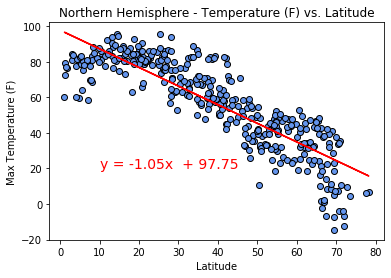

In [17]:
# Using the linear_regression function defined above, plot the linear regression between NH Temperature and Latitude
linear_regression(northern_hemp['Lat'], northern_hemp['Max Temp'], 'Latitude', 'Max Temperature (F)', 
                  'Northern Hemisphere - Temperature (F) vs. Latitude', 10, 20)

### Southern Hemisphere -  Latitude vs. Temperature (F)

The r-square value is: 0.55813.


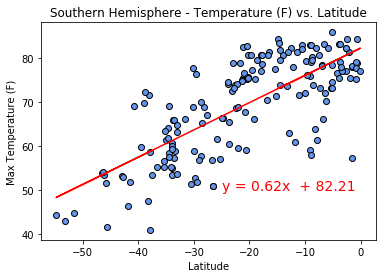

In [18]:
# Using the linear_regression function defined above, plot the linear regression between SH Temperature and Latitude
linear_regression(southern_hemp['Lat'], southern_hemp['Max Temp'], 'Latitude', 'Max Temperature (F)', 
                  'Southern Hemisphere - Temperature (F) vs. Latitude', -25, 50)

### Observations:

* Based on the r-square values:
    * The max temperature of cities in the northern hempishere appear to have a somewhat strong negative correlation with latitude. (As latitude increases for cities in the northern hemisphere, max temperature decreases).
    * The max temperature of cities in the southern hempishere appear to have a moderately positive correlation with latitude. (As latitude increases for cities in the southern hempishere, max temperature also increases).
* Overall Conclusion: cities closer to the equator are hotter.

### Northern Hemisphere -  Latitude vs. Humidity (%)

The r-square value is: 0.0842.


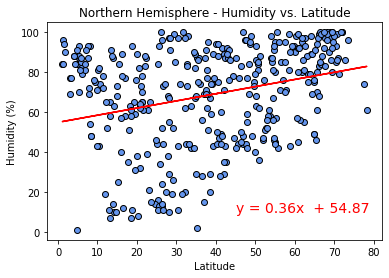

In [19]:
# Using the linear_regression function defined above, plot the linear regression between NH Humidity and Latitude
linear_regression(northern_hemp['Lat'], northern_hemp['Humidity'], 'Latitude', 'Humidity (%)', 
                  'Northern Hemisphere - Humidity vs. Latitude', 45, 10)

### Southern Hemisphere - Latitude vs. Humidity (%)

The r-square value is: 0.03166.


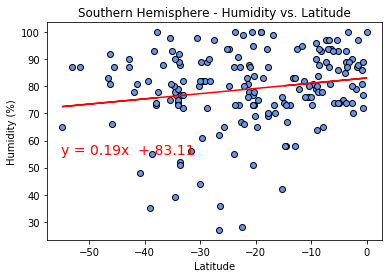

In [20]:
# Using the linear_regression function defined above, plot the linear regression between SH Humidity and Latitude
linear_regression(southern_hemp['Lat'], southern_hemp['Humidity'], 'Latitude', 'Humidity (%)', 
                  'Southern Hemisphere - Humidity vs. Latitude', -55, 55)

### Observations:

* Based on the r-square values:
    * The humidity % of cities in the northern hempishere appear to have a weak positive correlation with latitude.
    * The humidity % of cities in the southern hempishere appear to have a very weak positive correlation with latitude.
* Overall Conclusion: cities closer to the equator are not more or less humid.

### Northern Hemisphere - Latitude vs. Cloudiness (%)

The r-square value is: 0.0626.


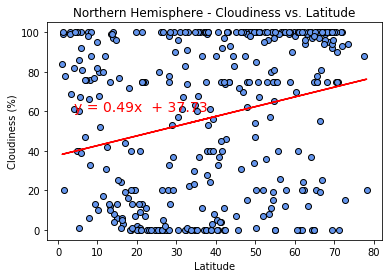

In [21]:
# Using the linear_regression function defined above, plot the linear regression between NH Cloudiness and Latitude
linear_regression(northern_hemp['Lat'], northern_hemp['Cloudiness'], 'Latitude', 'Cloudiness (%)', 
                  'Northern Hemisphere - Cloudiness vs. Latitude', 4, 60)

### Southern Hemisphere - Latitude vs. Cloudiness (%)

The r-square value is: 0.00024.


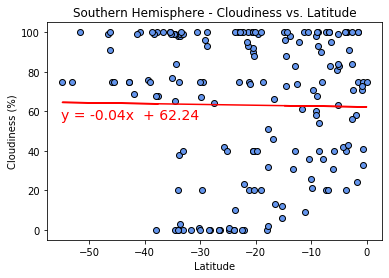

In [22]:
# Using the linear_regression function defined above, plot the linear regression between SH Cloudiness and Latitude
linear_regression(southern_hemp['Lat'], southern_hemp['Cloudiness'], 'Latitude', 'Cloudiness (%)', 
                  'Southern Hemisphere - Cloudiness vs. Latitude', -55, 56)

### Observations:

* Based on the r-square values:
    * The cloudiness % of cities in the northern hempishere appear to have a very weak positive correlation with latitude.
    * The cloudiness % of cities in the southern hempishere appear to have a very weak positive correlation with latitude.
* Overall Conclusion: cities closer to the equator are not more or less cloudy.

### Northern Hemisphere - Latitude vs. Wind Speed (mph)

The r-square value is: 0.00254.


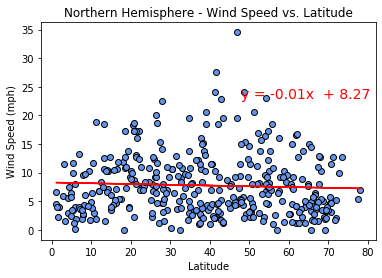

In [23]:
# Using the linear_regression function defined above, plot the linear regression between NH Wind Speed and Latitude
linear_regression(northern_hemp['Lat'], northern_hemp['Wind Speed'], 'Latitude', 'Wind Speed (mph)', 
                  'Northern Hemisphere - Wind Speed vs. Latitude', 48, 23)

### Southern Hemisphere - Latitude vs. Wind Speed (mph) 

The r-square value is: 0.11807.


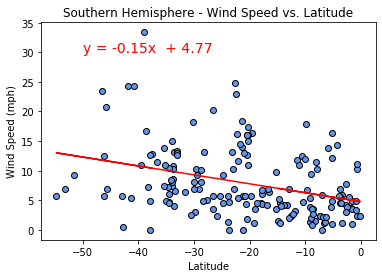

In [24]:
# Using the linear_regression function defined above, plot the linear regression between SH Wind Speed and Latitude
linear_regression(southern_hemp['Lat'], southern_hemp['Wind Speed'], 'Latitude', 'Wind Speed (mph)', 
                  'Southern Hemisphere - Wind Speed vs. Latitude', -50, 30)

### Observations:

* Based on the r-square values:
    * The wind speed of cities in the northern hempishere appear to have a very weak negative correlation with latitude.
    * The wind speed of cities in the southern hempishere appear to have a very weak negative correlation with latitude.
* Overall Conclusion: cities closer to the equator are not more or less windy.

## Summary of Observations

1. According to the analysis above, there is a relationship between where a city is located relative to the equator and the max temperature of that city. Specifically, we found that cities closer to the equator have higher max temperatures, thereby confirming our initial hypothesis that the weather is hotter as we approach the equator. 

2. There is not a strong relationship between where a city is located relative to the equator and humidity, cloudiness, or wind speed. (The lack of a relationship between city location and humidity was surprising to me!)

3. For cities in both the northern and southern hemispheres, the trend is the same: the closer you are to the equator, the higher your max temperature. However the max temperature for cities in the southern hemisphere (below the equator) appears to rarely go below 40 degrees, while the max temperature for cities in the northern hemisphere can get all the way down to -20 degrees if they are far enough from the equator. 
    * While nearly 70% of the cities selected from the API fall within the northern hemisphere, I am still confident in this conclusion as we have a total sample size of 550 cities.